### CLIP Example

In [1]:
pip install git+https://github.com/openai/CLIP.git


  Cloning https://github.com/openai/CLIP.git to /private/var/folders/h6/p_vmsqps1g95ht7ys9_v_9vm0000gn/T/pip-req-build-7_6y9b5e
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /private/var/folders/h6/p_vmsqps1g95ht7ys9_v_9vm0000gn/T/pip-req-build-7_6y9b5e
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
Note: you may need to restart the kernel to use updated packages.


## Approach: 
Using the CLIP model from OpenAI for image and text feature extraction and possibly for comparisons between the two. It includes installation, library imports, model loading, image processing, and feature calculation for both image and text inputs. The notebook also includes some advanced image manipulation techniques such as resizing, PCA (Principal Component Analysis), and KMeans clustering for image segmentation.
## Installation and Setup:

Install CLIP from the official GitHub repository.
Import necessary libraries such as torch, clip, PIL.Image, requests, and io.BytesIO.
Model Loading:

Load the CLIP model (ViT-B/32) onto the appropriate device (CPU or GPU).
## Image Processing:

Download images from URLs.

Check if the content is an image.

Display the image using PIL.

Preprocess the image to fit the input requirements of the CLIP model.

## Feature Extraction:
Prepare text inputs and tokenize them.

Extract features for both the image and text using the CLIP model.

## Advanced Image Manipulation:
Apply image resizing and filters.

Conduct PCA on image data to reduce dimensionality.

Use KMeans clustering to segment the image into different colors or features.

## Key Concepts and Keywords:
CLIP (Contrastive Language–Image Pre-training): A model trained to learn visual concepts from natural language supervision.

Image Processing: Techniques like resizing, filtering, and converting images into suitable formats for model input.

Feature Extraction: Using a pre-trained model to get image and text features that can be used for comparison or further machine learning tasks.

PCA (Principal Component Analysis): A technique to reduce the dimensionality of the data while maintaining as much variability as possible.

KMeans Clustering: An unsupervised learning algorithm used for image segmentation in this context.

In [2]:
### importing Libraries
import torch
import clip
import requests
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt
from PIL import ImageFilter
from PIL import Image

## Load the model

## device = "cpu": 
This line sets the device on which the model will run. Using "cpu" ensures that the model operates on the central processing unit, which is compatible with all types of hardware including those without a dedicated GPU.

model, preprocess = clip.load('ViT-B/32', device=device): This line loads the CLIP model:

clip.load is a function from the CLIP library that loads a pre-trained model.

'ViT-B/32' specifies the model variant, where "ViT" stands for Vision Transformer, and "B/32" indicates the model size and input specification (32x32 patches).

The model and preprocessing tools are loaded into the specified device, which in this case, is the CPU.

This setup is particularly useful for applications that require analyzing and processing both images and texts, enabling cross-modal comparisons and feature extractions directly on a MacBook or other non-CUDA capable devices.

In [3]:
# Force the model to load on the CPU
device = "cpu"
model, preprocess = clip.load('ViT-B/32', device=device)


## # Prepare the images

In [4]:

# Direct image URL
url = "https://buffer.com/cdn-cgi/image/w=1000,fit=contain,q=90,f=auto/library/content/images/size/w1200/2023/10/free-images.jpg"

response = requests.get(url)
if 'image' in response.headers['Content-Type']:
    img = Image.open(BytesIO(response.content))
    img.show()
else:
    print("Not an image. Content-Type:", response.headers['Content-Type'])


In [5]:
# Direct image URL
url = "https://media.tacdn.com/media/attractions-splice-spp-674x446/0b/27/60/85.jpg"

response = requests.get(url)
if 'image' in response.headers['Content-Type']:
    img = Image.open(BytesIO(response.content))
    img.show()
else:
    print("Not an image. Content-Type:", response.headers['Content-Type'])


In [6]:
# Prepare the image tensor
image_tensor = preprocess(img).unsqueeze(0).to(device)

In [7]:
# Prepare the text
texts = ["A beautiful landscape", "A cityscape"]  # Example descriptions
text_tokens = clip.tokenize(texts).to(device)

In [8]:
# Calculate features
with torch.no_grad():
    image_features = model.encode_image(image_tensor)
    text_features = model.encode_text(text_tokens)

# Calculate the cosine similarity between each image and text
similarities = torch.cosine_similarity(txt_features, image_features)


## Image manipulation

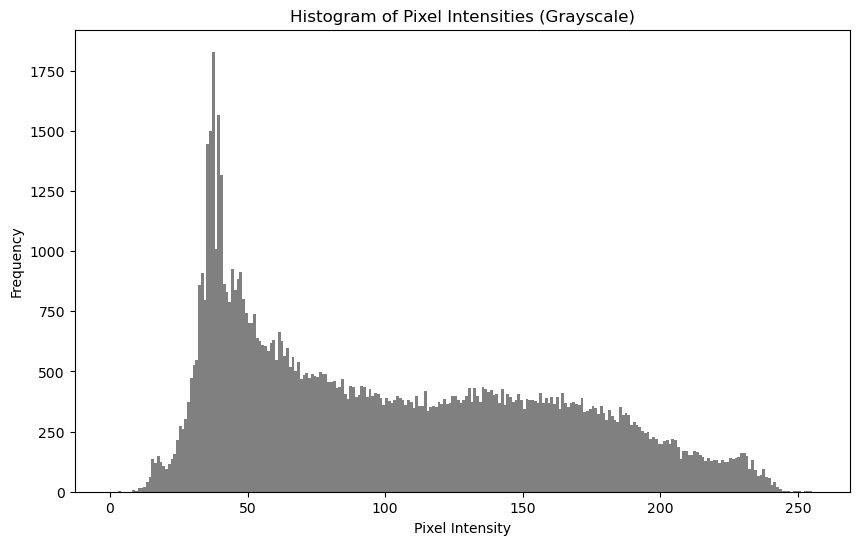

In [9]:

# Step 1: Load the image from the URL
url = "https://buffer.com/cdn-cgi/image/w=1000,fit=contain,q=90,f=auto/library/content/images/size/w1200/2023/10/free-images.jpg"
response = requests.get(url)

if 'image' in response.headers['Content-Type']:
    img = Image.open(BytesIO(response.content))

    # Step 2: Resize the image
    resized_img = img.resize((300, 300))
    
    # Display the resized image
    resized_img.show(title="Resized Image")

    # Step 3: Convert the image to grayscale
    grayscale_img = resized_img.convert('L')
    
    # Display the grayscale image
    grayscale_img.show(title="Grayscale Image")

    # Step 4: Plot histogram of pixel intensities (for grayscale image)
    pixel_values = np.array(grayscale_img).flatten()
    
    plt.figure(figsize=(10, 6))
    plt.hist(pixel_values, bins=256, range=(0, 256), color='gray')
    plt.title('Histogram of Pixel Intensities (Grayscale)')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()

    # Step 5: Apply a filter (e.g., blur)
    blurred_img = resized_img.filter(ImageFilter.BLUR)
    
    # Display the blurred image
    blurred_img.show(title="Blurred Image")

else:
    print("Not an image. Content-Type:", response.headers['Content-Type'])


## Grayscale Conversion: The image is converted to grayscale to simplify analysis and highlight intensity differences.
Histogram: A histogram of pixel intensities shows the distribution of brightness values in the grayscale image.
Blur Filter: A blur filter is applied using PIL's built-in filters, which can be useful in image preprocessing.
## Histogram of Pixel Intensities (Grayscale)
This histogram represents the distribution of pixel intensities in a grayscale image:

X-axis: Pixel intensity values ranging from 0 (black) to 255 (white).
Y-axis: Frequency of pixels at each intensity level.

## Key Observations:
Peak at Low Intensities: There is a significant peak around the lower intensity values (darker shades), indicating that a large portion of the image contains dark regions.

Gradual Decline: As the intensity increases, the frequency of pixels decreases, meaning there are fewer bright areas in the image.

Wide Spread: The pixel intensities are distributed across a wide range, indicating a variety of brightness levels within the image.

## edge detection

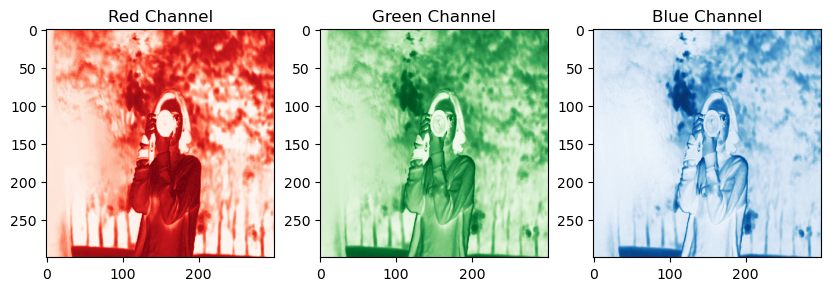

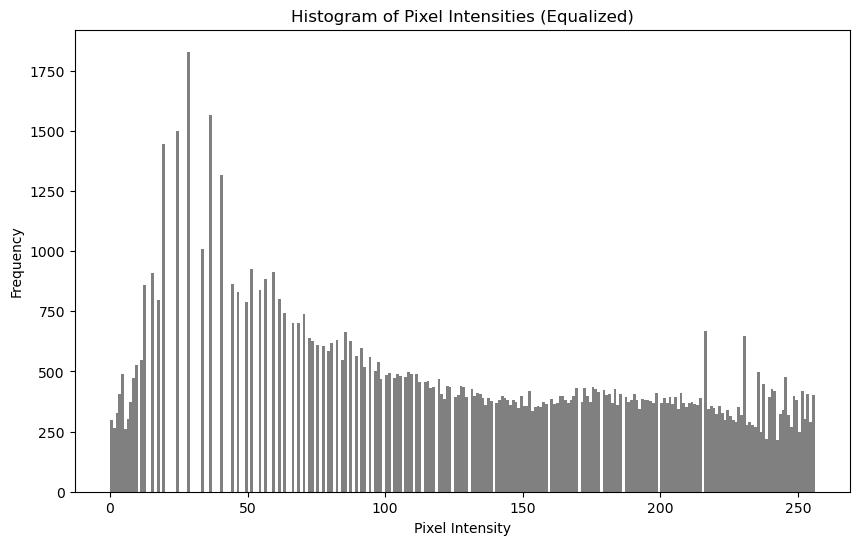

In [10]:
from PIL import Image, ImageFilter, ImageOps
# Step 1: Load the image from the URL
url = "https://buffer.com/cdn-cgi/image/w=1000,fit=contain,q=90,f=auto/library/content/images/size/w1200/2023/10/free-images.jpg"
response = requests.get(url)

if 'image' in response.headers['Content-Type']:
    img = Image.open(BytesIO(response.content))

    # Step 2: Resize the image
    resized_img = img.resize((300, 300))
    resized_img.show(title="Resized Image")

    # Step 3: Convert to Grayscale
    grayscale_img = resized_img.convert('L')
    grayscale_img.show(title="Grayscale Image")

    # Step 4: Separate color channels (Red, Green, Blue)
    r, g, b = resized_img.split()
    
    # Displaying each channel
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 3, 1)
    plt.imshow(r, cmap='Reds')
    plt.title('Red Channel')

    plt.subplot(1, 3, 2)
    plt.imshow(g, cmap='Greens')
    plt.title('Green Channel')

    plt.subplot(1, 3, 3)
    plt.imshow(b, cmap='Blues')
    plt.title('Blue Channel')

    plt.show()

    # Step 5: Edge detection using PIL's FIND_EDGES filter
    edge_img = grayscale_img.filter(ImageFilter.FIND_EDGES)
    edge_img.show(title="Edge Detection")

    # Step 6: Histogram Equalization (enhances contrast)
    equalized_img = ImageOps.equalize(grayscale_img)
    equalized_img.show(title="Equalized Grayscale Image")

    # Step 7: Histogram of pixel intensities (for equalized grayscale image)
    pixel_values = np.array(equalized_img).flatten()
    
    plt.figure(figsize=(10, 6))
    plt.hist(pixel_values, bins=256, range=(0, 256), color='gray')
    plt.title('Histogram of Pixel Intensities (Equalized)')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()

    # Step 8: Image Rotation
    angles = [45, 90, 180]
    
    for angle in angles:
        rotated_img = resized_img.rotate(angle)
        rotated_img.show(title=f"Rotated Image by {angle} Degrees")

else:
    print("Not an image. Content-Type:", response.headers['Content-Type'])


## Breakdown of Additional Visualizations:
## RGB Channel Separation and Histogram Equalization
RGB Channel Separation:

The first set of images illustrates the separation of the Red, Green, and Blue channels of the original image:

Red Channel: Highlights the intensity of red pixels across the image.

Green Channel: Displays the green pixel intensities.

Blue Channel: Shows the blue pixel distribution.

Each channel shows how the image's colors are composed from individual RGB values, with brighter areas representing higher intensity in that channel.

## Histogram of Pixel Intensities (Equalized):
The second image represents a histogram of pixel intensities after equalization. Histogram equalization enhances contrast by redistributing pixel intensities, making the distribution more uniform:

Increased Contrast: The pixel intensities are spread more evenly across the range (0-255), reducing the dominance of certain intensity ranges.

Improved Image Details: Helps to bring out finer details in underexposed or overexposed regions of the image.

This process improves the visual quality of the image, particularly in areas with poor contrast.



















## feature extraction using color histograms

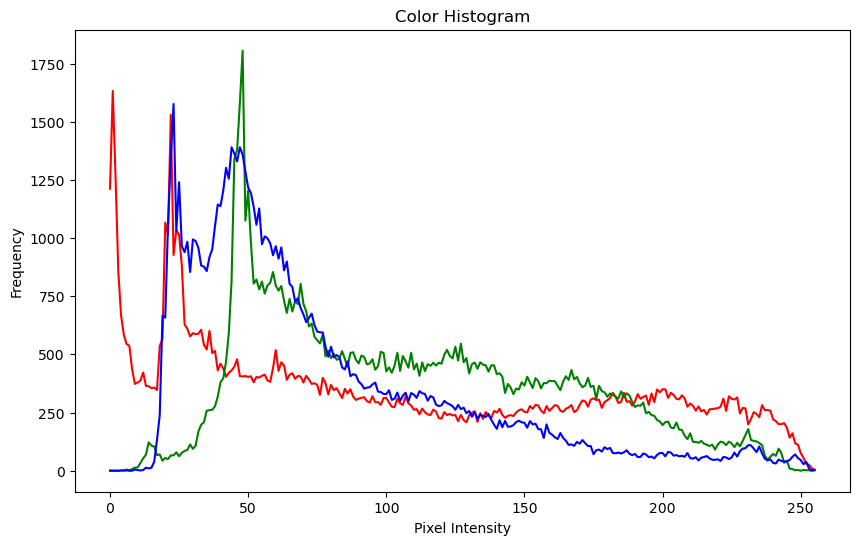

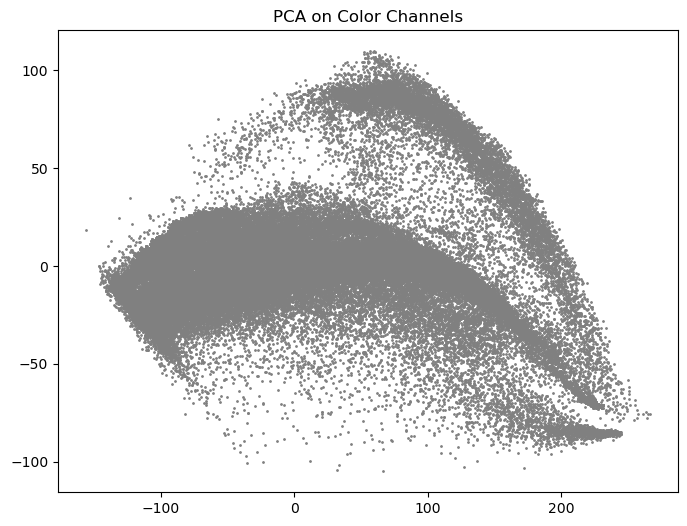

In [12]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2
import requests
from io import BytesIO

# Step 1: Load the image from the URL
url = "https://buffer.com/cdn-cgi/image/w=1000,fit=contain,q=90,f=auto/library/content/images/size/w1200/2023/10/free-images.jpg"
response = requests.get(url)

if 'image' in response.headers['Content-Type']:
    img = Image.open(BytesIO(response.content))
    resized_img = img.resize((300, 300))

    # Convert to NumPy array for feature extraction
    img_array = np.array(resized_img)

    # Step 2: Color Histogram for each channel (Red, Green, Blue)
    colors = ('r', 'g', 'b')
    plt.figure(figsize=(10, 6))
    
    for i, color in enumerate(colors):
        hist = cv2.calcHist([img_array], [i], None, [256], [0, 256])
        plt.plot(hist, color=color)
    
    plt.title('Color Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()

    # Step 3: Applying PCA to reduce dimensionality of color channels
    img_flat = img_array.reshape(-1, 3)  # Flatten the image into (N, 3) where N is the number of pixels
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(img_flat)

    # Visualize the result of PCA
    plt.figure(figsize=(8, 6))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], s=1, c='gray')
    plt.title('PCA on Color Channels')
    plt.show()

else:
    print("Not an image. Content-Type:", response.headers['Content-Type'])


## Color Histogram and PCA on Color Channels
## Color Histogram:
This plot shows the distribution of pixel intensities for each color channel (Red, Green, and Blue) in the image.

Red Channel: Peaks at lower intensity values, indicating dominance of darker red tones.

Green Channel: More widely distributed, with a noticeable peak around mid-intensity.

Blue Channel: Concentrated at lower intensity values but spreads across the entire range.

This color histogram helps visualize the intensity variations and balance of colors in the image.


## PCA on Color Channels:
The second plot is a Principal Component Analysis (PCA) applied to the image's color channels. The data points represent a projection of the RGB pixel values onto the first two principal components.

Clusters and Spread: The scattered points indicate the variations in pixel color, with distinct shapes revealing the dominant color structures in the image.

Dimensionality Reduction: PCA reduces the dimensionality of the image's color data, making it easier to understand the major variance in color distribution.

This visualization is useful for understanding the overall structure of color information in the image.







